## LearnR

Note that metapath names with `<` are [currently truncated](https://github.com/IRkernel/IRkernel/issues/286) in the notebook, unless they are specially HTML escaped.

In [1]:
library(magrittr)

## Read datasets

In [2]:
auroc_df = readr::read_tsv('data/feature-performance/auroc.tsv') %>%
  dplyr::mutate(fdr_delta_auroc = p.adjust(pval_delta_auroc, method = 'fdr')) %>%
  dplyr::mutate(fdr_significant = fdr_delta_auroc <= 0.01)

# auroc_df = readr::read_tsv('data/auroc.tsv')
# degrees = dplyr::filter(auroc_df, feature_type == 'degree')$feature
# metapaths = dplyr::filter(auroc_df, feature_type == 'dwpc')$feature

# # col_types not needed here, but used for safety
# col_types = list()
# for (metapath in metapaths) {
#   col_types[[metapath]] = readr::col_number()
# }
# for (degree in degrees) {
#   col_types[[degree]] = readr::col_integer()
# }

feature_df = readr::read_tsv('data/matrix/rephetio-v2.0/transformed-features.tsv.bz2')

In [3]:
perm_affected = dplyr::filter(auroc_df, fdr_delta_auroc <= 0.01)$metapath
perm_affected = paste0('dwpc_', perm_affected)
length(perm_affected)

[1] 444

## Dataset preparation

In [4]:
head(feature_df, 2)

,compound_id,disease_id,status,disease_name,compound_name,prior_logit,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,ellip.h,rdwpc_CuGuDtCtD,dwpc_CuGuDuGaD,pdwpc_CuGuDuGaD,rdwpc_CuGuDuGaD,dwpc_CuGuDuGdD,pdwpc_CuGuDuGdD,rdwpc_CuGuDuGdD,dwpc_CuGuDuGuD,pdwpc_CuGuDuGuD,rdwpc_CuGuDuGuD
1,DB00091,DOID:0060073,0,lymphatic system cancer,Cyclosporine,-3.0002,4.0946,6.5338,6.2146,1.4436,⋯,1.0169,1.2737,0.88981,0.38386,0,0,0,0,0,0
2,DB00206,DOID:0060073,0,lymphatic system cancer,Reserpine,-4.4925,2.7765,4.4545,5.3376,0.88137,⋯,-0.23221,0.49511,0.31749,0.17762,0,0,0,0,0,0


In [5]:
features = auroc_df$feature
X_list = list()
X_list$all_features = X = feature_df %>%
  dplyr::select(prior_logit, starts_with('degree_'), starts_with('dwpc_')) %>%
  as.matrix()
X_list$perm_affected = feature_df %>%
  dplyr::select(prior_logit, starts_with('degree_'), one_of(perm_affected)) %>%
  as.matrix()
y = feature_df$status
sprintf("%s compound–disease pairs × %s features", nrow(X), ncol(X))

[1] "3775 compound–disease pairs × 1223 features"

In [6]:
# Number of features by type
table(sapply(strsplit(colnames(X), '_'), function(x) x[[1]][1]))


degree   dwpc  prior 
    16   1206      1 

## Prior probability performance baseline

In [7]:
hetior::calc_vtms(feature_df$status, feature_df$prior_logit)[c('auroc', 'auprc')]

$auroc
[1] 0.8481643

$auprc
[1] 0.6083106

## Parameter Sweep

In [8]:
n_runs = 50

In [9]:
results = list()
i = 1
for (feature_set in names(X_list)) {
  for (seed in 1:n_runs) {
    elem = list(seed = seed, feature_set = feature_set)
    X = X_list[[feature_set]]
    
    # Set penalty factor for prior to 0
    penalty_factor = ifelse(colnames(X) == 'prior_logit', 0, 1)
    
    elem$fit = hetior::glmnet_train(X = X, y = y, alpha = 1, cores=12, seed=seed,
        penalty.factor=penalty_factor, lambda.min.ratio=1e-5, nlambda=200)
    elem$coef_df = elem$fit$coef_df %>%
      dplyr::filter(zcoef != 0) %>%
      dplyr::mutate(seed = seed, feature_set = feature_set)
    elem$pos_coefs = sum(elem$coef_df$zcoef > 0)
    elem$neg_coefs = sum(elem$coef_df$zcoef < 0)
    results[[i]] = elem
    i = i + 1
  }
}
length(results)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



[1] 100

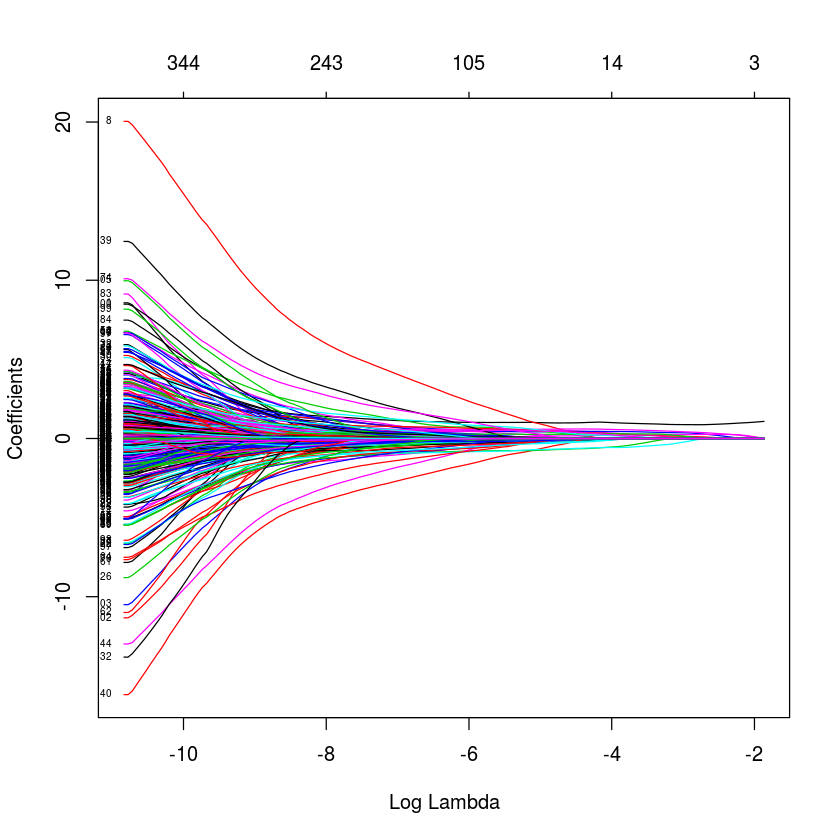

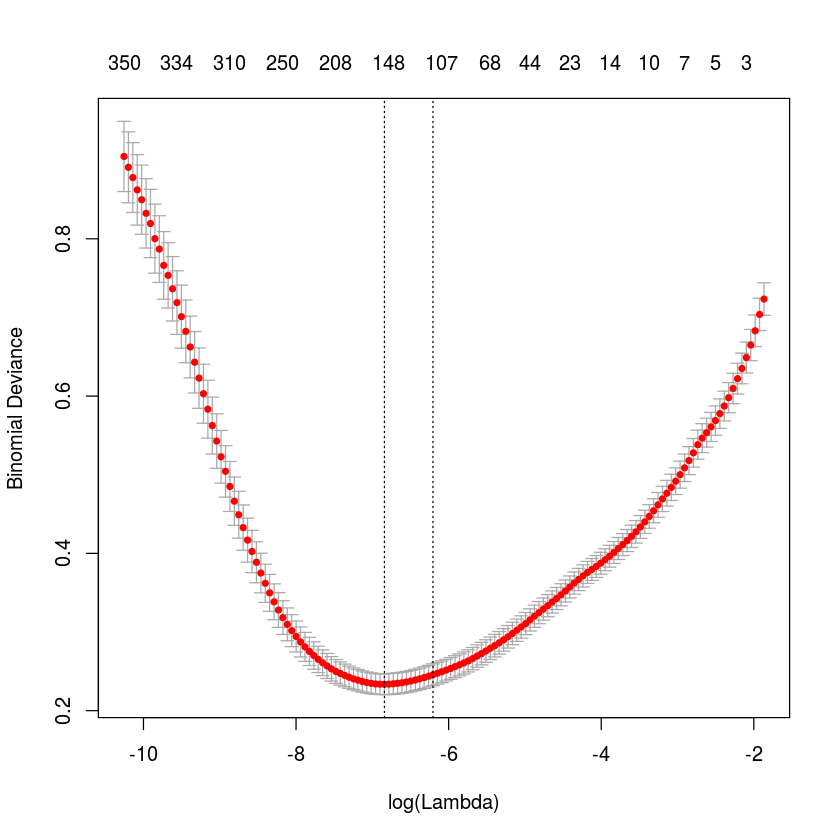

In [10]:
# Plot a single glmnet fit for diagnostics
plot(elem$fit$cv_model$glmnet.fit, xvar = "lambda", label = TRUE)
plot(elem$fit$cv_model)

## Summarize selection sweep

In [19]:
sweep_summary_df = do.call(rbind, lapply(results, function(x) {dplyr::data_frame(
    seed = x$seed,
    feature_set = x$feature_set,
    auroc = x$fit$vtm$auroc,
    auprc = x$fit$vtm$auprc,
    tjur = x$fit$vtm$tjur,
    pos_coefs = x$pos_coefs,
    neg_coefs = x$neg_coefs
)}))
sweep_summary_df %>% head(2)

,seed,feature_set,auroc,auprc,tjur,pos_coefs,neg_coefs
1,1,all_features,0.9931814,0.9761146,0.8034864,60,63
2,2,all_features,0.9931814,0.9761146,0.8034864,60,63


In [12]:
sweep_summary_df %>%
  dplyr::group_by(feature_set) %>%
  dplyr::do(
    dplyr::bind_cols(
      ggplot2::mean_cl_normal(.$auroc) %>% dplyr::rename(auroc=y, auroc_lower=ymin, auroc_upper=ymax),
      ggplot2::mean_cl_normal(.$auprc) %>% dplyr::rename(auprc=y, auprc_lower=ymin, auprc_upper=ymax),
      ggplot2::mean_cl_normal(.$tjur) %>% dplyr::rename(tjur=y, tjur_lower=ymin, tjur_upper=ymax))
    )

,feature_set,auroc,auroc_lower,auroc_upper,auprc,auprc_lower,auprc_upper,tjur,tjur_lower,tjur_upper
1,all_features,0.9937124,0.9934722,0.9939525,0.9777794,0.9770313,0.9785276,0.8095391,0.8067532,0.812325
2,perm_affected,0.9910271,0.9908263,0.9912279,0.970385,0.9698219,0.9709482,0.7905049,0.788592,0.7924178


In [13]:
p_all_features = subset(sweep_summary_df, feature_set == 'all_features')$auroc
p_perm_affected = subset(sweep_summary_df, feature_set == 'perm_affected')$auroc
t.test(p_all_features, p_perm_affected)$p.value

[1] 5.257792e-31

In [14]:
sweep_coef_df = do.call(rbind, lapply(results, function(x) {x$coef_df}))
head(sweep_coef_df, 2)

,feature,coef,zcoef,seed,feature_set
1,intercept,-0.6659686,-3.232678,1,all_features
2,prior_logit,1.178938,1.787004,1,all_features


In [15]:
sweep_feature_df = sweep_coef_df %>%
  dplyr::group_by(feature, feature_set) %>%
  dplyr::summarize(
    selection_rate = n() / n_runs
  ) %>%
  dplyr::ungroup() %>%
  tidyr::spread(feature_set, selection_rate, fill=0) %>%
  dplyr::arrange(desc(all_features))
head(sweep_feature_df, 2)

,feature,all_features,perm_affected
1,degree_CrC,1,1
2,degree_CtD,1,1


In [16]:
# Unique features
nrow(sweep_feature_df)

[1] 227

In [17]:
sweep_feature_df %>% readr::write_tsv('selection/sweep-features.tsv')
sweep_coef_df %>% readr::write_tsv('selection/sweep-coefficients.tsv')
sweep_summary_df %>% readr::write_tsv('selection/sweep-model-summaries.tsv')